KPCA

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [4]:
if __name__ == "__main__":
    
    dt_Ecommerce = pd.read_csv('./Data/ECommerce_consumer_behaviour.csv')

    columns_to_drop = ['reordered', 'department', 'product_name']
    dt_features = dt_Ecommerce.drop(columns=columns_to_drop, axis=1)
    dt_target = dt_Ecommerce['reordered']

    dt_features = StandardScaler().fit_transform(dt_features)
    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

    # Manejar los valores faltantes (NaN) en X_train
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)

    # Aplicar PCA al conjunto de datos sin valores faltantes
    pca = PCA(n_components=2)  # Reducir a 2 componentes
    X_train_pca = pca.fit_transform(X_train_imputed)

    # Aplicar KernelPCA al conjunto de datos sin valores faltantes
    kpca = KernelPCA(n_components=2, fit_inverse_transform=False)  # Reducir a 2 componentes
    X_train_kpca = kpca.fit_transform(X_train_pca)

    # Manejar los valores faltantes (NaN) en X_test
    X_test_imputed = imputer.transform(X_test)

    # Aplicar PCA y luego KernelPCA al conjunto de datos sin valores faltantes
    X_test_pca = pca.transform(X_test_imputed)
    X_test_kpca = kpca.transform(X_test_pca)

    # Crear y entrenar el modelo de regresión logística
    logistic = LogisticRegression(solver='lbfgs')
    logistic.fit(X_train_kpca, y_train)

    # Evaluar el modelo en el conjunto de prueba
    accuracy = logistic.score(X_test_kpca, y_test)
    print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.6283333333333333


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

In [5]:
print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.6283333333333333


Graficas KPCA

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


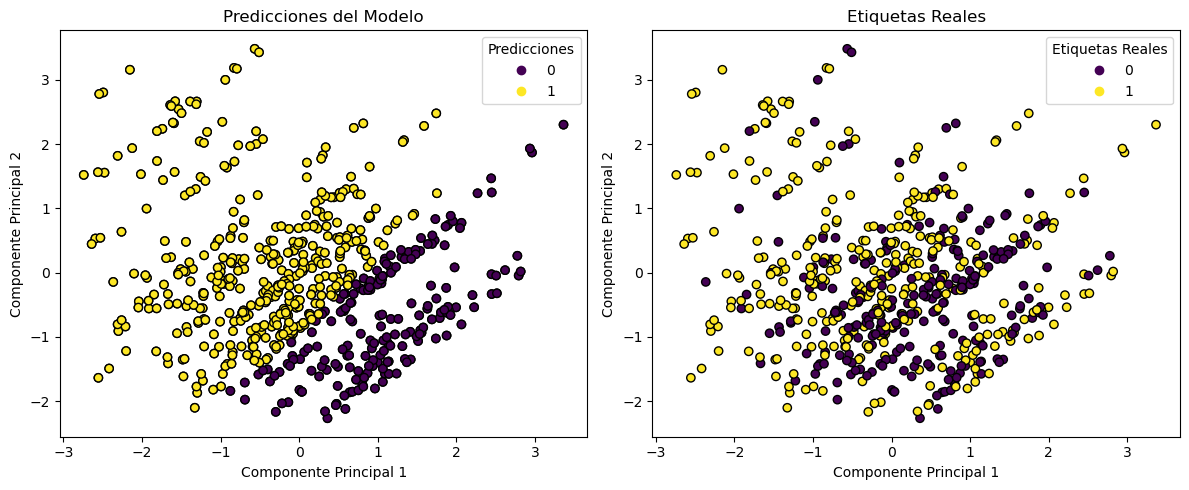

In [6]:
# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train_kpca, y_train)
predictions = logistic.predict(X_test_kpca)

# Gráfico de dispersión para visualizar las predicciones
axes[0].scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=predictions, cmap='viridis', edgecolors='k')
axes[0].set_title('Predicciones del Modelo')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
# Gráfico de dispersión para visualizar las predicciones
scatter_pred = axes[0].scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=predictions, cmap='viridis', edgecolors='k')
axes[0].set_title('Predicciones del Modelo')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')

# Gráfico de dispersión para visualizar las etiquetas reales
scatter_real = axes[1].scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test, cmap='viridis', edgecolors='k')
axes[1].set_title('Etiquetas Reales')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')

# Crear leyenda
legend_pred = axes[0].legend(*scatter_pred.legend_elements(), title='Predicciones')
legend_real = axes[1].legend(*scatter_real.legend_elements(), title='Etiquetas Reales')

# Ajustar el diseño para que la leyenda no se superponga
fig.tight_layout()

# Mostrar la leyenda
plt.show()